In [1]:
from pytket import OpType

In [2]:
from pytket import Circuit

In [3]:
from pytket import Circuit

In [97]:
from pytket.circuit import Circuit
from pytket.circuit import CircBox
from pytket.circuit import QControlBox
from pytket.passes import DecomposeBoxes
from pytket.extensions.nexus import NexusBackend, QuantinuumConfig, Nexus
from datetime import datetime
from pytket.circuit.display import render_circuit_jupyter
import numpy as np



In [12]:
qft3_circ = Circuit(3)
qft3_circ.H(0)
qft3_circ.CU1(0.5, 1, 0)
qft3_circ.CU1(0.25, 2, 0)
qft3_circ.H(1)
qft3_circ.CU1(0.5, 2, 1)
qft3_circ.H(2)
qft3_circ.SWAP(0, 2)
render_circuit_jupyter(qft3_circ)

In [13]:
def build_qft_circuit(n_qubits: int) -> Circuit:
    circ = Circuit(n_qubits, name="QFT")
    for i in range(n_qubits):
        circ.H(i)
        for j in range(i + 1, n_qubits):
            circ.CU1(1 / 2 ** (j - i), j, i)
    for k in range(0, n_qubits // 2):
        circ.SWAP(k, n_qubits - k - 1)
    return circ

In [14]:
qft4_circ: Circuit = build_qft_circuit(4)
render_circuit_jupyter(qft4_circ)

In [17]:
qft4_box: CircBox = CircBox(qft4_circ)
qft_circ = Circuit(4).add_gate(qft4_box, [0, 1, 2, 3])
render_circuit_jupyter(qft_circ)

In [18]:
inv_qft4_box = qft4_box.dagger
render_circuit_jupyter(inv_qft4_box.get_circuit())

In [100]:
def build_phase_estimation_circuit(
    n_measurement_qubits: int, state_prep_circuit: Circuit, unitary_circuit: Circuit, bayesian: int, currentQubit:int
) -> Circuit:
    # Define a Circuit with a measurement and prep register




    qpe_circ: Circuit = Circuit()
    n_state_prep_qubits = state_prep_circuit.n_qubits
    measurement_register = qpe_circ.add_q_register("m", n_measurement_qubits)
    state_prep_register = qpe_circ.add_q_register("p", n_state_prep_qubits)
    qpe_circ.add_circuit(state_prep_circuit, list(state_prep_register))

    # Create a controlled unitary with a single control qubit
    unitary_circuit.name = "U"
    controlled_u_gate = QControlBox(CircBox(unitary_circuit), 1)

    # Add Hadamard gates to every qubit in the measurement register
    for m_qubit in measurement_register:
        qpe_circ.H(m_qubit)

    # Add all (2**n_measurement_qubits - 1) of the controlled unitaries sequentially
    if (bayesian == 0):
        for m_qubit in range(n_measurement_qubits):
            control_index = n_measurement_qubits - m_qubit -1
            control_qubit = [measurement_register[control_index]]
            for _ in range(2**m_qubit):
                qpe_circ.add_qcontrolbox(
                    controlled_u_gate, control_qubit + list(state_prep_register)
                )
    else:
        for m_qubit in range(currentQubit+1):
            control_index = n_measurement_qubits-m_qubit-1
            control_qubit = [measurement_register[control_index]]
            for _ in range(2**m_qubit):
                qpe_circ.add_qcontrolbox(
                    controlled_u_gate, control_qubit + list(state_prep_register)
                )
        

    # Finally, append the inverse qft and measure the qubits
    if (bayesian==0):
        qft_box = CircBox(build_qft_circuit(n_measurement_qubits))
        inverse_qft_box = qft_box.dagger
        qpe_circ.add_circbox(inverse_qft_box, list(measurement_register))
    else: #replace qft with hadamard similar to IQPE
        for m_qubit in measurement_register:
            qpe_circ.H(m_qubit)
    qpe_circ.measure_register(measurement_register, "c")
    return qpe_circ

loop:  0



New project created: Phase Estimation Tutorial - 2024-02-03 21:30:19.511176

Started using project with name: Phase Estimation Tutorial - 2024-02-03 21:30:19.511176
counts:  Counter({(0, 0, 0, 1): 836, (0, 0, 0, 0): 164})


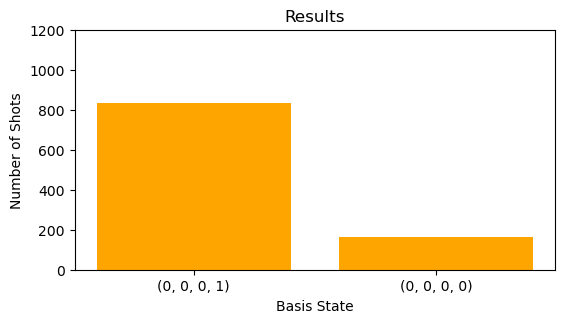

theta:  0.0625
likelihood_1:  0
loop:  1



New project created: Phase Estimation Tutorial - 2024-02-03 21:30:30.371491

Started using project with name: Phase Estimation Tutorial - 2024-02-03 21:30:30.371491
counts:  Counter({(0, 0, 1, 1): 445, (0, 0, 0, 1): 385, (0, 0, 1, 0): 98, (0, 0, 0, 0): 72})


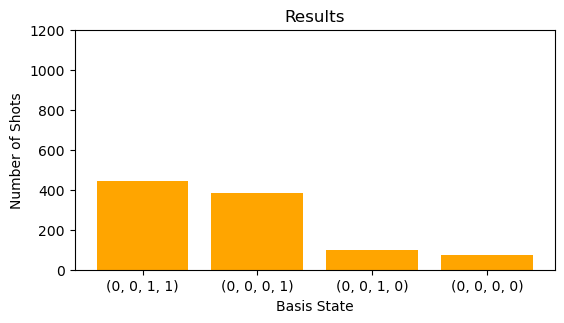

theta:  0.1875
likelihood_1:  0
loop:  2



New project created: Phase Estimation Tutorial - 2024-02-03 21:30:46.309196

Started using project with name: Phase Estimation Tutorial - 2024-02-03 21:30:46.309196
counts:  Counter({(0, 1, 1, 1): 453, (0, 1, 0, 1): 357, (0, 1, 1, 0): 91, (0, 1, 0, 0): 81, (0, 0, 1, 1): 11, (0, 0, 0, 1): 7})


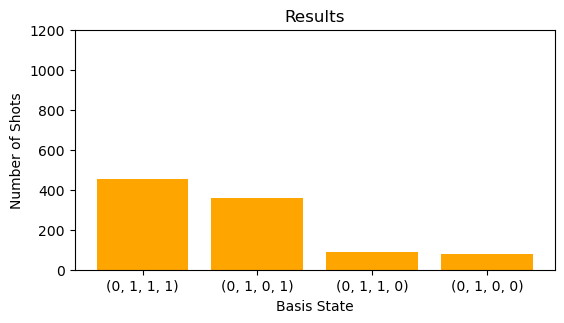

theta:  0.4375
likelihood_1:  0.091
loop:  3



New project created: Phase Estimation Tutorial - 2024-02-03 21:31:02.209206

Started using project with name: Phase Estimation Tutorial - 2024-02-03 21:31:02.209206
counts:  Counter({(0, 1, 1, 1): 427, (0, 1, 0, 1): 344, (0, 1, 1, 0): 79, (0, 1, 0, 0): 69, (1, 1, 1, 1): 31, (1, 1, 0, 1): 25, (1, 1, 1, 0): 9, (0, 0, 1, 1): 5, (0, 0, 0, 1): 4, (1, 1, 0, 0): 4, (0, 0, 1, 0): 3})


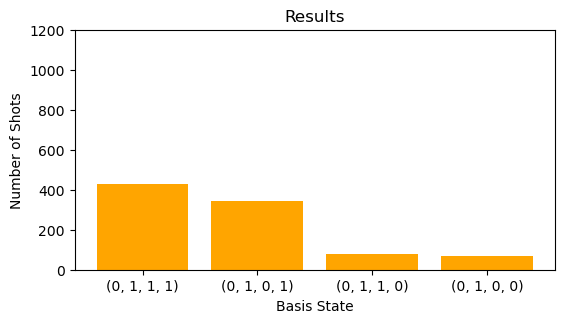

theta:  0.4375
likelihood_1:  0.079
test
input angle/2:  0.365
error:  0.145
Estimated Phase: 1.1826873643474762 rad


In [110]:

def bayesian_phase_estimation():

    prior_mu=0
    prior_kappa=0

    phase_estimates = []
    
    # Initialize prior
    mu, kappa = prior_mu, prior_kappa


    for i in range(4): #number of qubits
        print('loop: ',i)
        prep_circuit = Circuit(1).X(0)  # prepare the |1> eigenstate of U1
        input_angle = 0.73  # angle as number of half turns
        unitary_circuit = Circuit(1).U1(input_angle, 0)  # Base unitary for controlled U ops
        qpe_circ_trivial = build_phase_estimation_circuit(
            4, state_prep_circuit=prep_circuit, unitary_circuit=unitary_circuit,bayesian=1,currentQubit=i)
        render_circuit_jupyter(qpe_circ_trivial)
        phase_est_project = Nexus().new_project(f"Phase Estimation Tutorial - {datetime.now()}")
    
        configuration = QuantinuumConfig(device_name="H1-1LE", user_group="iQuHACK_2024")
        
        
        backend = NexusBackend(
            backend_config= configuration, 
            project= phase_est_project
        )
        
        
        
        DecomposeBoxes().apply(qpe_circ_trivial)
        compiled_circ = backend.get_compiled_circuit(qpe_circ_trivial)
        n_shots = 1000
        result = backend.run_circuit(compiled_circ, n_shots)
        print('counts: ',result.get_counts())
    
        def plot_qpe_results(
            sim_result: BackendResult,
            n_strings: int = 4,
            dark_mode: bool = False,
            y_limit: int = 1000,
        ) -> None:
            """
            Plots results in a barchart given a BackendResult. the number of stings displayed
            can be specified with the n_strings argument.
            """
            counts_dict = sim_result.get_counts()
            sorted_shots = counts_dict.most_common()
            n_most_common_strings = sorted_shots[:n_strings]
            x_axis_values = [str(entry[0]) for entry in n_most_common_strings]  # basis states
            y_axis_values = [entry[1] for entry in n_most_common_strings]  # counts
            if dark_mode:
                plt.style.use("dark_background")
            fig = plt.figure()
            ax = fig.add_axes((0, 0, 0.75, 0.5))
            color_list = ["orange"] * (len(x_axis_values))
            ax.bar(
                x=x_axis_values,
                height=y_axis_values,
                color=color_list,
            )
            ax.set_title(label="Results")
            plt.ylim([0, y_limit])
            plt.xlabel("Basis State")
            plt.ylabel("Number of Shots")
            plt.show()
        plot_qpe_results(result, y_limit=int(1.2 * n_shots))
    
        def single_phase_from_backendresult(result: BackendResult) -> float:
            # Extract most common measurement outcome
            basis_state = result.get_counts().most_common()[0][0]
            bitstring = "".join([str(bit) for bit in basis_state])
            integer_j = int(bitstring, 2)
            
            
            # Calculate theta estimate
            return [integer_j / (2 ** len(bitstring)), result.get_counts()]
    
        theta, counts = single_phase_from_backendresult(result)
        print('theta: ',theta)
        # Update the phase estimate based on measurement
        if (0,1,1,0) in counts:
            likelihood_1 = counts[(0,1,1,0)] / n_shots
        else:
            likelihood_1 = 0
    
    
        print('likelihood_1: ', likelihood_1)
        kappa_update = kappa + likelihood_1 * n_shots
        mu_update = mu + np.arccos(1 - 2*likelihood_1)
        
        mu, kappa = mu_update, kappa_update
        phase_estimates.append(mu)
        

        
    
        
    print('test')
    print('input angle/2: ', input_angle / 2)
    error = round(abs(input_angle - (2 * theta)), 3)
    print('error: ', error)
    
    # Convert the final estimate to the [0, 2*pi) range
    final_phase_estimate = mu % (2 * np.pi)

    
    return final_phase_estimate, phase_estimates

estimated_phase, phase_estimates = bayesian_phase_estimation()
print(f"Estimated Phase: {estimated_phase} rad")

In [107]:
phase_est_project = Nexus().new_project(f"Phase Estimation Tutorial - {datetime.now()}")

configuration = QuantinuumConfig(device_name="H1-1LE", user_group="iQuHACK_2024")


backend = NexusBackend(
    backend_config= configuration, 
    project= phase_est_project
)



DecomposeBoxes().apply(qpe_circ_trivial)


New project created: Phase Estimation Tutorial - 2024-02-03 21:29:53.752548

Started using project with name: Phase Estimation Tutorial - 2024-02-03 21:29:53.752548


False

In [108]:
compiled_circ = backend.get_compiled_circuit(qpe_circ_trivial)

In [109]:
n_shots = 1000
result = backend.run_circuit(compiled_circ, n_shots)
print(result.get_counts())

Counter({(0, 1, 1, 0): 932, (0, 1, 0, 1): 16, (0, 1, 1, 1): 16, (1, 0, 0, 0): 10, (0, 1, 0, 0): 9, (0, 0, 0, 0): 4, (0, 0, 1, 0): 4, (1, 0, 0, 1): 2, (1, 1, 0, 1): 2, (0, 0, 0, 1): 1, (1, 0, 1, 0): 1, (1, 0, 1, 1): 1, (1, 1, 0, 0): 1, (1, 1, 1, 1): 1})


In [36]:
from pytket.backends.backendresult import BackendResult
import matplotlib.pyplot as plt

In [37]:
def plot_qpe_results(
    sim_result: BackendResult,
    n_strings: int = 4,
    dark_mode: bool = False,
    y_limit: int = 1000,
) -> None:
    """
    Plots results in a barchart given a BackendResult. the number of stings displayed
    can be specified with the n_strings argument.
    """
    counts_dict = sim_result.get_counts()
    sorted_shots = counts_dict.most_common()
    n_most_common_strings = sorted_shots[:n_strings]
    x_axis_values = [str(entry[0]) for entry in n_most_common_strings]  # basis states
    y_axis_values = [entry[1] for entry in n_most_common_strings]  # counts
    if dark_mode:
        plt.style.use("dark_background")
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 0.75, 0.5))
    color_list = ["orange"] * (len(x_axis_values))
    ax.bar(
        x=x_axis_values,
        height=y_axis_values,
        color=color_list,
    )
    ax.set_title(label="Results")
    plt.ylim([0, y_limit])
    plt.xlabel("Basis State")
    plt.ylabel("Number of Shots")
    plt.show()

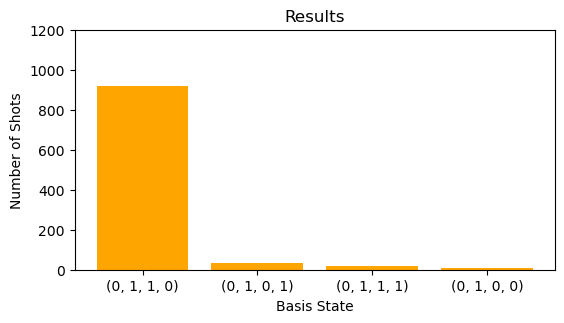

In [38]:
plot_qpe_results(result, y_limit=int(1.2 * n_shots))

In [39]:
from pytket.backends.backendresult import BackendResult

In [62]:
def single_phase_from_backendresult(result: BackendResult) -> float:
    # Extract most common measurement outcome
    basis_state = result.get_counts().most_common()[0][0]
    bitstring = "".join([str(bit) for bit in basis_state])
    integer_j = int(bitstring, 2)
  

    # Calculate theta estimate
    return [integer_j / (2 ** len(bitstring)), result.get_counts()]

In [63]:
print(bitstring)

0110


In [65]:
theta, counts = single_phase_from_backendresult(result)

In [76]:
print(theta)
print(counts)
# Update the phase estimate based on measurement
if (0,1,1,0) in counts:
    likelihood_1 = counts[(0,1,1,0)] / n_shots
else:
    likelihood_1 = 0
    
print(likelihood_1)

0.375
Counter({(0, 1, 1, 0): 918, (0, 1, 0, 1): 33, (0, 1, 1, 1): 19, (0, 1, 0, 0): 11, (0, 0, 1, 1): 5, (1, 0, 1, 1): 4, (0, 0, 1, 0): 2, (1, 0, 1, 0): 2, (0, 0, 0, 0): 1, (0, 0, 0, 1): 1, (1, 0, 0, 0): 1, (1, 0, 0, 1): 1, (1, 1, 1, 0): 1, (1, 1, 1, 1): 1})
0.918


In [43]:
print(input_angle / 2)

0.365


In [44]:
error = round(abs(input_angle - (2 * theta)), 3)
print(error)

0.02
